
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):
        X = np.array(X)
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        self.eps = 1e-8
        return self
    
    
    def transform(self, X):
        X = np.array(X)
        return (X - self.mean_) / (self.std_ + self.eps)
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [3]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        n, d = X.shape

        self.w = np.zeros(d)
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            y_pred = X @ self.w + self.b

            error = y_pred - y
            loss = np.mean(error ** 2) + self.l2_lambda * np.sum(self.w ** 2)
            self.losses.append(loss)

            dw = (2/n) * (X.T @ error) + 2 * self.l2_lambda * self.w
            db = (2/n) * np.sum(error)

            self.w -= self.lr * dw
            self.b -= self.lr * db
            

    def predict(self, X):
        X = np.array(X)
        return X @ self.w + self.b


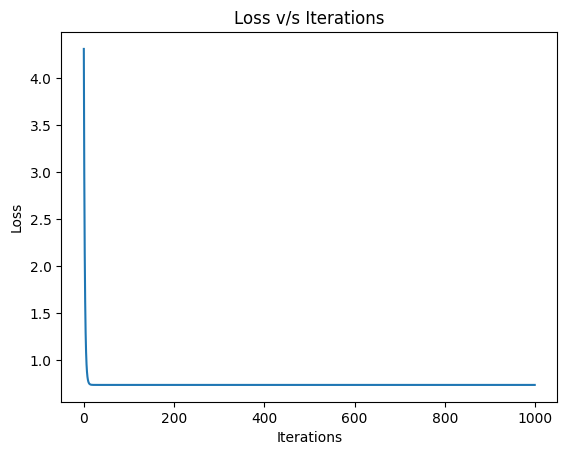

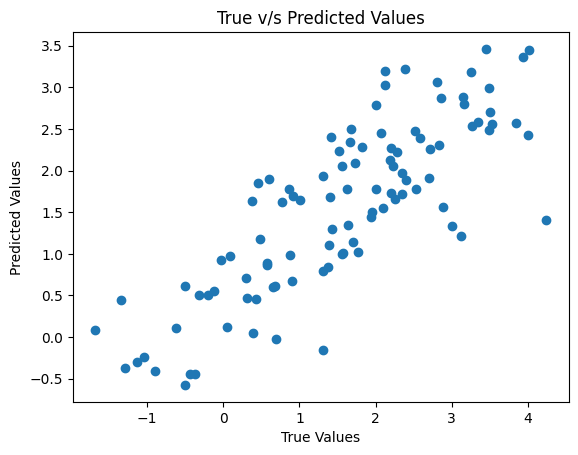

In [5]:

np.random.seed(42)
X = np.random.rand(100, 2)
true_w = np.array([3, -2])
y = X @ true_w + 1 + np.random.randn(100)*0.8

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LinearRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)


plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss v/s Iterations")
plt.show()

plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True v/s Predicted Values")
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [6]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))


In [7]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        n, d = X.shape

        self.w = np.zeros(d)
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            z = X @ self.w + self.b
            y_hat = sigmoid(z)

            eps = 1e-8
            loss = -np.mean(
                y * np.log(y_hat + eps) +
                (1 - y) * np.log(1 - y_hat + eps)
            )
            loss += self.l2_lambda * np.sum(self.w ** 2)
            self.losses.append(loss)

            dw = (1 / n) * (X.T @ (y_hat - y)) + 2 * self.l2_lambda * self.w
            db = (1 / n) * np.sum(y_hat - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        X = np.array(X)
        return sigmoid(X @ self.w + self.b)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)


Final Accuracy: 0.98


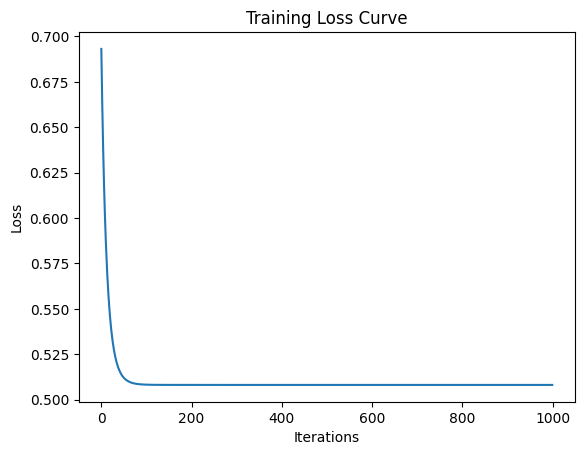

In [8]:

np.random.seed(42)
X = np.random.randn(200, 2)
true_w = np.array([2, -3])
y = (sigmoid(X @ true_w + 0.5) >= 0.5).astype(int)

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)

accuracy = np.mean(y_pred == y)
print("Final Accuracy:", accuracy)

plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [9]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    M = np.array(M)
    n, m = M.shape

    
    values = []
    positions = []
    for i in range(n):
        for j in range(n):
            values.append(M[i][j])
            positions.append((i, j))

    values = np.array(values) 

    
    centroids = random.sample(list(values), k) 

    for _ in range(max_iters):
        clusters = {k: [] for k in range(k)}

        
        for idx, val in enumerate(values):
            distances = [abs(val - c) for c in centroids]
            clusters_id = np.argmin(distances)
            clusters[clusters_id].append(idx)

        
        new_centroids = []
        for l in range(k):
            if clusters[l]:
                cluster_vals = [values[idx] for idx in clusters[l]]
                new_centroids.append(np.mean(cluster_vals)) 
            else:
                new_centroids.append(random.choice(values))  

        
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids   

    
    assignment_table = np.zeros((n, m), dtype=int)        
    cookbook = {k: [] for k in range(k)}

    for l in range(k):
        for idx in clusters[l]:
            i, j = positions[idx]  
            assignment_table[i][j] = l
            cookbook[l].append((i, j))

    return assignment_table, cookbook, np.array(centroids)  


M = np.random.rand(5, 8)
k = 5

assignment_table, cookbook, centroids = kmeans_matrix(M, k)

print("Matrix:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCookbook:\n", cookbook)
print("\nCentroids:\n", centroids)


              


Matrix:
 [[0.4148195  0.27340707 0.0563755  0.86472238 0.81290101 0.99971767
  0.99663684 0.55543171]
 [0.76898742 0.94476573 0.84964739 0.2473481  0.45054414 0.12915942
  0.95405103 0.60617463]
 [0.22864281 0.67170068 0.61812824 0.35816272 0.11355759 0.6715732
  0.5203077  0.77231839]
 [0.5201635  0.8521815  0.55190684 0.56093797 0.8766536  0.40348287
  0.13401523 0.02878268]
 [0.75513726 0.62030955 0.70407977 0.21296416 0.13637148 0.01454467
  0.35058756 0.58991769]]

Assignment Table:
 [[2 4 4 0 0 0 0 0]
 [1 0 0 4 2 0 0 0]
 [4 1 1 2 4 0 0 0]
 [3 0 3 3 0 0 0 0]
 [1 1 1 4 4 0 0 0]]

Cookbook:
 {0: [(0, 3), (0, 4), (1, 1), (1, 2), (3, 1), (3, 4)], 1: [(1, 0), (2, 1), (2, 2), (4, 0), (4, 1), (4, 2)], 2: [(0, 0), (1, 4), (2, 3)], 3: [(3, 0), (3, 2), (3, 3)], 4: [(0, 1), (0, 2), (1, 3), (2, 0), (2, 4), (4, 3), (4, 4)]}

Centroids:
 [0.86681193 0.68972382 0.40784212 0.5443361  0.1812381 ]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
